<a href="https://colab.research.google.com/github/ali-rn/DataProject1/blob/main/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: CSV**

In [3]:
# ETL Pipeline

# fetch csv file
path = '/content/drive/MyDrive/Fall 2024/TOP 100 IMDB MOVIES.csv'

# csv to dataframe
import pandas as pd
df = pd.read_csv(path, index_col=0)

# generate summary of data file ingestion
print('Raw IMDb Rankings')
print('Records: ', len(df))
print('Columns: ', len(df.columns))
print('\nStat Summary:', df.describe())

# simplify: take out description and genre
df = df.drop(columns=['description', 'genre'])

# sort by rank
df = df.sort_values(by=['rank'])

# capitalize first letter of column labels
df.columns = df.columns.str.capitalize()

# generate summary of postprocessed data
print('\n\nPost-Processed IMDb Rankings')
print('Records: ', len(df))
print('Columns: ', len(df.columns))
print('\nStat Summary:', df.describe())

Raw IMDb Rankings
Records:  100
Columns:  5

Stat Summary:           rating         year
count  100.00000   100.000000
mean     8.52200  1988.070000
std      0.20869    23.069178
min      8.30000  1931.000000
25%      8.40000  1974.750000
50%      8.50000  1994.000000
75%      8.60000  2003.250000
max      9.30000  2023.000000


Post-Processed IMDb Rankings
Records:  100
Columns:  3

Stat Summary:           Rating         Year
count  100.00000   100.000000
mean     8.52200  1988.070000
std      0.20869    23.069178
min      8.30000  1931.000000
25%      8.40000  1974.750000
50%      8.50000  1994.000000
75%      8.60000  2003.250000
max      9.30000  2023.000000


In [4]:
# give user the option to store dataframe as either JSON or SQL
import json
import requests
from sqlalchemy import create_engine

file_type = input('Do you want to save data as a "json" or "sql"? (type one): ')

if file_type == "json":
  # convert dataframe to JSON
  df.to_json('imdb_rankings.json')

  # save locally
  with open('/content/drive/MyDrive/Fall 2024/imdb_rankings.json', 'w') as f:
    json.dump(df.to_dict('records'), f)

  print('saved locally to JSON file')

elif file_type == "sql":
  # convert dataframe to SQL
  engine = create_engine('sqlite:///imdb_rankings.db')
  df.to_sql('imdb_rankings', engine, if_exists='replace', index=False)

  print('saved to SQL database')

else:
  print('Invalid input')

Do you want to save data as a "json" or "sql"? (type one): json
saved locally to JSON file


# **Part 2: JSON**

In [ ]:
!pip install pandas requests sqlalchemy

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import json
import matplotlib.pyplot as plt

In [ ]:
with open('recipes.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Convert Ingredients and Instructions to strings for SQL storage
df['Ingredients'] = df['Ingredients'].apply(lambda x: json.dumps(x))
df['Instructions'] = df['Instructions'].astype(str)

# Fill in blank data with empty strings
df.fillna('', inplace=True)

# Check data summary before proceeding
print('Data Summary before Processing')
print(df.head())

Data Summary before Processing
                                                 Url  \
0   https://www.chefkoch.de/rezepte/185441079701305/   
1  https://www.chefkoch.de/rezepte/2718181424631245/   
2    https://www.chefkoch.de/rezepte/46341015661368/   
3    https://www.chefkoch.de/rezepte/51051018014178/   
4  https://www.chefkoch.de/rezepte/1555771262860408/   

                                        Instructions  \
0  Die Eier hart kochen. Dann pellen und mit eine...   
1  Vorab folgende Bemerkung: Alle Mengen sind Cir...   
2  Die Kirschen abtropfen lassen, dabei den Saft ...   
3  Den Spargel säubern, die holzigen Enden abschn...   
4  Kohlrabi schälen und klein würfeln. Mit der Br...   

                                         Ingredients  Day  \
0  ["600 g Hackfleisch, halb und halb", "800 g Sa...    1   
1  ["1 kg Strauchtomate(n)", "1 Gem\u00fcsezwiebe...    1   
2  ["1 Glas Kirsche(n)", "1 Pck. Vanillepuddingpu...    1   
3  ["500 g Spargel, gr\u00fcner", "300 ml Br\u00f..

In [ ]:
# Option to store as CSV or in SQL
file_type = input('Do you want to save the data as "csv" or "sql"? (type one): ').lower()
if file_type == "csv":
  # Conversion to CSV file
  df.to_csv('recipes.csv', index=False)
  print("Data has been saved as 'recipes.csv'")

elif file_type == "sql":
  # Set up SQLite connection
  engine = create_engine('sqlite:///mydatabase.db')

  # Save the DataFrame to an SQLite table
  df.to_sql('recipes', engine, if_exists='replace', index=False)
  print("Data has been saved in the SQLite database 'mydatabase.db' under the table 'recipes'")

else:
    print("Invalid input. Please type either 'csv' or 'sql'.")

Do you want to save the data as "csv" or "sql"? (type one): sql
Data has been saved in the SQLite database 'mydatabase.db' under the table 'recipes'


Transformed data has been saved in the SQLite database 'mydatabase.db' under the table 'transformed_recipes'
Transformed Data Summary
                                                 Url  \
0   https://www.chefkoch.de/rezepte/185441079701305/   
1  https://www.chefkoch.de/rezepte/2718181424631245/   
2    https://www.chefkoch.de/rezepte/46341015661368/   
3    https://www.chefkoch.de/rezepte/51051018014178/   
4  https://www.chefkoch.de/rezepte/1555771262860408/   

                                        Instructions  \
0  Die Eier hart kochen. Dann pellen und mit eine...   
1  Vorab folgende Bemerkung: Alle Mengen sind Cir...   
2  Die Kirschen abtropfen lassen, dabei den Saft ...   
3  Den Spargel säubern, die holzigen Enden abschn...   
4  Kohlrabi schälen und klein würfeln. Mit der Br...   

                                         Ingredients  \
0  ["600 g Hackfleisch, halb und halb", "800 g Sa...   
1  ["1 kg Strauchtomate(n)", "1 Gem\u00fcsezwiebe...   
2  ["1 Glas Kirsche(n)",

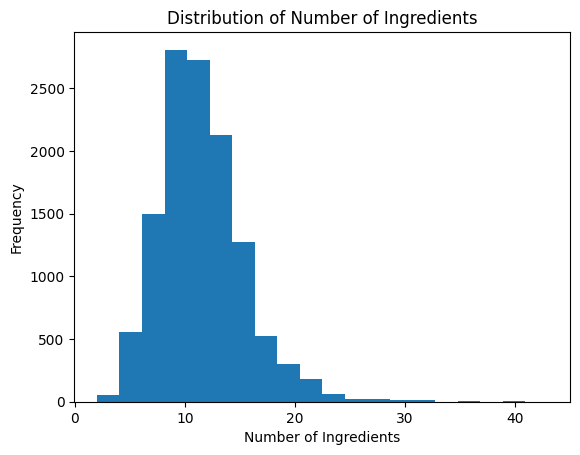

In [ ]:
# Transformed Data
# Example based on number of ingredients (you can adjust the thresholds)
df['number_ingredients'] = df['Ingredients'].apply(lambda x: len(json.loads(x)))
df['complexity'] = df['number_ingredients'].apply(lambda x: 'Simple' if x < 5 else 'Complex')

df.drop(columns=['Day', 'Weekday'], inplace=True)

if file_type == 'csv':
  df.to_csv('transformed_recipes.csv', index=False)
  print("Transformed data has been saved as 'transformed_recipes.csv'")
elif file_type == 'sql':
  df.to_sql('transformed_recipes', engine, if_exists='replace', index=False)
  print("Transformed data has been saved in the SQLite database 'mydatabase.db' under the table 'transformed_recipes'")

print('Transformed Data Summary')
print(df.head())

df['number_ingredients'].plot(kind='hist', bins=20)
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()